DC, for the Employment data analysis Please do the Data preparatin as following:

Get the following fields from the CICdata

  customer_id, TIN, run_date, occupationdesc, occupationstatusdesc, TradeName, employment_duration_in_days (DateHiredTo or run_date - DateHiredFrom), PSICdesc, AnnualMonthlyIndicator, Currency, GrossIncome, max_sanctioned_amt_24m, max_creditcard_limit_24m, max_financed_amt_24m, tot_granted_contracts_cnt_24m, tot_granted_contracts_amt_12m, max_sanctioned_amt_12m, Max_CreditCard_limit_12m, max_financed_amt_12m, tot_granted_contracts_cnt_12m, tot_granted_contracts_amt_12m
  
  Get the self declared employment details, application_date,  and MaxSalary information from our internal Salary scaling table using the CustomerID or TIN and application_date = run_date
  
  Get the gender, age, region, province of the customer from demographic table using customer_id or TIN and application_date = run_date
  
  Get the following fields from the Credolab tables using the customer_id or mobile number and application_date = run date:
  Device Price
  Device Manufacturer (Apple/ Samsung/ Oppo etc.)
  Device Model
  Device Age (usually derived by the application_date - earliest apps installation date)
  number of job search apps installed (linkedin, jobstreet, glint etc.)
  number of professional apps installed (office, gdrive etc)
  number of ecommerce apps installed (lazada, shopee, shein, zalora, temu etc.)
  number of ride hailing apps installed (grab, moveit etc.)
  number of finance apps installed (Banking apps, FinTech apps, eWallet apps)
  number of Risky apps (gambling apps, crypto apps, payday loan apps)
  number of OTT apps (Netflix, PrimeVideo etc.)
  Sowndarya: may be you can share your earlier apps categorisation work with DC for this. To keep things simple, just give him your final app categorisation mapping.

DC, next steps on the Income data:
Tradename column from CICdata is missing, pls add it
Calculate the employment duration (if no end date then run date - start date, otherwise end date - start date, if no start date then null)
Create two additional flags from CICdata:
--> Has Credit Loan (credit_loan_flag)
--> Has Installment loan flag (inst_loan_flag)
Add the other Credolab fields:
--> App category wise count (just use Credolab app categories)
-->  Device Brand (from credolab_raw.android_credolab_datasets_struct_columns` select Hardware.device_brand)
--> Device Model (from credolab_raw.android_credolab_datasets_struct_columns` select Hardware.device_model)
--> Network Provider (from credolab_raw.android_credolab_datasets_struct_columns` select GeneralData.sim_operator_name)
--> Number of BlueTooth Device (from credolab_raw.android_credolab_datasets_struct_columns` select Hardware.bluetooth__bonded_devices_count)

# <div align="center" style="color: #ff5733;">Income Estimation Data Preparation</div>

In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
# Example: pd.set_option('display.max_columns', None)

In [2]:
sq = """select * from prj-prod-dataplatform.dl_loans_db_raw.tdbk_loans_salary_scale_mtb limit 10;"""

incomesource = client.query(sq).to_dataframe(progress_bar_type='tqdm')

Job ID 0bdab059-e119-4203-8228-c5088b353e06 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


In [3]:
incomesource.head()

,industryId,occupationId,maxSalary,createdBy,createdDt,updatedBy,updatedDt
0,1,1,24505.00,IT,2022-12-06 17:03:17+00:00,IT,2024-07-25 13:18:44+00:00
1,1,4,46866.00,IT,2022-12-06 17:03:18+00:00,IT,2024-07-25 13:18:44+00:00
2,1,2,23617.00,IT,2022-12-06 17:03:18+00:00,IT,2024-07-25 13:18:44+00:00
3,1,3,50054.00,IT,2022-12-06 17:03:18+00:00,IT,2024-07-25 13:18:44+00:00
4,1,5,29793.00,IT,2022-12-06 17:03:18+00:00,IT,2024-07-25 13:18:44+00:00


In [4]:
sq = """select * from prj-prod-dataplatform.dl_loans_db_raw.tdbk_loans_occupation_mtb limit 10;"""

occupationdf = client.query(sq).to_dataframe(progress_bar_type='tqdm')

Job ID 3aed0b0d-d345-4abe-a37a-a83d0a8a1734 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


In [5]:
occupationdf.head()

,id,name,createdBy,status,createdDt,updatedBy,updatedDt
0,1,Market Gardeners and Crop Growers,IT,true,2022-12-06 17:02:20+00:00,IT,2022-12-06 17:02:20+00:00
1,68,Metal Working Machine Tool Setters and Operators,IT,true,2022-12-06 17:02:24+00:00,IT,2022-12-06 17:02:24+00:00
2,59,"Glass Makers, Cutters, Grinders and Finishers",IT,true,2022-12-06 17:02:24+00:00,IT,2022-12-06 17:02:24+00:00
3,73,Electrical Engineers,IT,true,2022-12-06 17:02:24+00:00,IT,2022-12-06 17:02:24+00:00
4,61,Glass And Ceramics Plant Operators,IT,true,2022-12-06 17:02:24+00:00,IT,2022-12-06 17:02:24+00:00


In [6]:
sq = """select * from prj-prod-dataplatform.risk_credit_cic_data.employment_data limit 10;"""

employmentdata = client.query(sq).to_dataframe(progress_bar_type='tqdm')

employmentdata.head()

Job ID 30a92144-18ff-41a3-9d4d-0aab6e608d4c successfully executed: 100%|██████████|
Downloading: 100%|██████████|


,digitalLoanAccountId,crifApplicationId,customerId,processEngineGuid,requestGuid,LastUpdateDate,AnnualMonthlyIndicator,Currency,DateHiredFrom,DateHiredTo,...,Occupation,OccupationStatus,PhoneNumber,PSIC,TIN,CurrencyDesc,OccupationDesc,OccupationStatusDesc,PSICDesc,TradeName
0,f0aeab9f-7654-48e2-ac6b-d63552f06df3,tonik-tul-201599,1724055,1864e760-9331-11ed-a91e-0242ace60011,1849be40-9331-11ed-92a6-0242ace60002,2017-09-05,None,None,None,None,...,None,None,0544737000,None,None,None,None,None,None,BIGS NUGGETS CORPORATION
1,c86641c7-15b0-41c0-9957-02bee1bff5de,tonik-tul-201609,1498484,cb999330-9336-11ed-a91e-0242ace60011,cb7e6a10-9336-11ed-92a6-0242ace60002,2020-03-01,None,None,2013-05-27,None,...,None,1,None,None,None,None,None,Permanent Job (Private sector),None,ROBINSONS SUPERMARKET
2,40699713-881f-4f54-9485-0bf2dfd585f0,tonik-tul-201649,1860857,e926ffa0-934f-11ed-a91e-0242ace60011,e90a4fe0-934f-11ed-92a6-0242ace60002,2020-11-19,Y,PHP,None,None,...,None,None,88925931,None,None,Philippine peso,None,None,None,VALDES ABAD AND COMPANY
3,6c1eaee6-27c9-4686-bbec-4c95c01b0e4a,tonik-tul-201416,1860005,0ce42660-92e8-11ed-a91e-0242ace60011,0cc7ebd0-92e8-11ed-92a6-0242ace60002,2021-02-26,None,None,None,None,...,None,1,3224888,None,None,None,None,Permanent Job (Private sector),None,CENTURY HOTEL
4,6e66deca-cace-48e2-8d96-de954301c6ad,tonik-tul-201615,1860716,45e5d5b0-933a-11ed-a91e-0242ace60011,45c5ca90-933a-11ed-92a6-0242ace60002,2021-05-31,None,None,None,None,...,None,None,02-8232-9125,None,None,None,None,None,None,NOVABALA JV CORP


In [7]:
import time

In [8]:
%%time

# getting the customer demographic information from loan master table and employment information from cic employment data table

sq ="""with base as
(
-- Query for dfgranted
SELECT
  digitalLoanAccountId,
  crifApplicationId,
  customerId,
  processEngineGuid,
  requestGuid,
  ContractHistoryType,
  CBContractCode,
  ContractEndDate,
  ContractPhase,
  ContractPhaseDesc,
  ContractStartDate,
  ContractStatus,
  ContractStatusDesc,
  ContractType,
  ContractTypeDesc,
  Currency,
  CurrencyDesc,
  LastUpdateDate,
  OriginalCurrency,
  OriginalCurrencyDesc,
  ProviderCodeEncrypted,
  ProviderContractNo,
  ReferenceNo,
  Role,
  RoleDesc,
  BilledAmount,
  BoardResolutionFlag,
  BoardResolutionFlagDesc,
  CancellationDate,
  CardReferenceCode,
  ChargedAmount,
  CreditLimit,
  CreditPurpose,
  CreditPurposeDesc,
  FinancedAmount,
  FirstPaymentDate,
  FlagCardUsed,
  HolderLiability,
  HolderLiabilityDesc,
  InstallmentType,
  InstallmentTypeDesc,
  InstallmentsNumber,
  LastChargeDate,
  LastPaymentAmount,
  LastPaymentDate,
  MinPaymentIndicator,
  MinPaymentIndicatorDesc,
  MinPaymentPercentage,
  MonthlyPaymentAmount,
  NextPayment,
  NextPaymentDate,
  OutstandingBalance,
  OutstandingBalanceUnbilled,
  OutstandingPaymentsNumber,
  OverallCreditLimit,
  OverdueDays,
  OverdueDaysDesc,
  OverduePaymentsAmount,
  OverduePaymentsNumber,
  PaymentMethod,
  PaymentMethodDesc,
  PaymentPeriodicity,
  PaymentPeriodicityDesc,
  PremiumCard,
  PremiumCardDesc,
  ReorganizedCreditCode,
  ReorganizedCreditCodeDesc,
  ServicesLinesNo,
  TimesCardUsed,
  TransactionType,
  TransactionTypeDesc,
  Utilization,
  LinkedSubject_CBSubjectCode,
  LinkedSubject_Name,
  LinkedSubject_Role,
  LinkedSubject_RoleDesc,
  Note_TypeDesc,
  Note_Text,
  Note_Type,
  run_date,
  NULL AS ContractRequestDate,
  'granted' AS source
FROM
  prj-prod-dataplatform.risk_credit_cic_data.granted_contracts

UNION ALL

-- Query for dfnongranted
SELECT
  digitalLoanAccountId,
  crifApplicationId,
  customerId,
  processEngineGuid,
  requestGuid,
  NULL AS ContractHistoryType,
  CBContractCode,
  NULL AS ContractEndDate,
  ContractPhase,
  ContractPhaseDesc,
  NULL AS ContractStartDate,
  NULL AS ContractStatus,
  NULL AS ContractStatusDesc,
  ContractType,
  ContractTypeDesc,
  NULL AS Currency,
  NULL AS CurrencyDesc,
  LastUpdateDate,
  NULL AS OriginalCurrency,
  NULL AS OriginalCurrencyDesc,
  ProviderCodeEncrypted,
  ProviderContractNo,
  ReferenceNo,
  Role,
  RoleDesc,
  NULL AS BilledAmount,
  NULL AS BoardResolutionFlag,
  NULL AS BoardResolutionFlagDesc,
  NULL AS CancellationDate,
  NULL AS CardReferenceCode,
  NULL AS ChargedAmount,
  CreditLimit,
  NULL AS CreditPurpose,
  NULL AS CreditPurposeDesc,
  FinancedAmount,
  NULL AS FirstPaymentDate,
  NULL AS FlagCardUsed,
  NULL AS HolderLiability,
  NULL AS HolderLiabilityDesc,
  NULL AS InstallmentType,
  NULL AS InstallmentTypeDesc,
  InstallmentsNumber,
  NULL AS LastChargeDate,
  NULL AS LastPaymentAmount,
  NULL AS LastPaymentDate,
  NULL AS MinPaymentIndicator,
  NULL AS MinPaymentIndicatorDesc,
  NULL AS MinPaymentPercentage,
  MonthlyPaymentAmount,
  NULL AS NextPayment,
  NULL AS NextPaymentDate,
  NULL AS OutstandingBalance,
  NULL AS OutstandingBalanceUnbilled,
  NULL AS OutstandingPaymentsNumber,
  NULL AS OverallCreditLimit,
  NULL AS OverdueDays,
  NULL AS OverdueDaysDesc,
  NULL AS OverduePaymentsAmount,
  NULL AS OverduePaymentsNumber,
  NULL AS PaymentMethod,
  NULL AS PaymentMethodDesc,
  PaymentPeriodicity,
  PaymentPeriodicityDesc,
  NULL AS PremiumCard,
  NULL AS PremiumCardDesc,
  NULL AS ReorganizedCreditCode,
  NULL AS ReorganizedCreditCodeDesc,
  NULL AS ServicesLinesNo,
  NULL AS TimesCardUsed,
  NULL AS TransactionType,
  NULL AS TransactionTypeDesc,
  NULL AS Utilization,
  LinkedSubject_CBSubjectCode,
  LinkedSubject_Name,
  LinkedSubject_Role,
  LinkedSubject_RoleDesc,
  Note_TypeDesc,
  Note_Text,
  Note_Type,
  run_date,
  ContractRequestDate,
  'nongranted' AS source
FROM
  prj-prod-dataplatform.risk_credit_cic_data.notgranted_contracts
),
base2 as
(select distinct * from base),
loanmaster as --- data from loan master for customer demographic details
(select distinct customerId, digitalLoanAccountId, loanAccountNumber, startApplyDateTime, natureofwork,industryDescription, incomeMultiple, employmentstatus,credolabScore,city,
       barangay, province, postalCode, age, monthlyIncome,  tinNumber, gender, dateOfBirth, email, mobileNo,firstName, middleName, lastName, custLoanJourneyZipCode,
       custLoanJourneyProvince, custLoanJourneyCity,  tsa_onboarding_time,new_loan_type, dependentsCount,
       incomeperSalaryScale
 from prj-prod-dataplatform.risk_credit_mis.loan_master_table),
employmentdata as ---- data from employment table for employment related information
(SELECT distinct
  digitalLoanAccountId,
  crifApplicationId,
  customerId,
  AnnualMonthlyIndicator,
  Currency,
  DateHiredFrom,
  DateHiredTo,
  case when DateHiredFrom is null then null
       when DateHiredFrom is not null and  DateHiredTo is not null then date_diff(date(DateHiredTo), date(DateHiredFrom), month)
       when DateHiredFrom is not null and DateHiredTo is null then date_diff(date((select min(run_date) from base2 where base2.digitalLoanAccountId = digitalLoanAccountId)), date(DateHiredFrom), month)
       else null end Employment_duration,
  GrossIncome,
  CAST(
    CASE
      WHEN COALESCE(AnnualMonthlyIndicator, 'NA') LIKE 'M' THEN CAST(COALESCE(GrossIncome, '0') AS NUMERIC)
      WHEN COALESCE(AnnualMonthlyIndicator, 'NA') LIKE 'Y' THEN ROUND(CAST(COALESCE(GrossIncome, '0') AS NUMERIC)/12, 0)
      ELSE 0
    END AS INT64
  ) AS MonthlyIncomecalculated,
  CAST(
    CASE
      WHEN COALESCE(AnnualMonthlyIndicator, 'NA') LIKE 'M' THEN ROUND(CAST(COALESCE(GrossIncome, '0') AS NUMERIC)*12, 0)
      WHEN COALESCE(AnnualMonthlyIndicator, 'NA') LIKE 'Y' THEN CAST(COALESCE(GrossIncome, '0') AS NUMERIC)
      ELSE 0
    END AS INT64
  ) AS AnnualIncomecalculated,
  Occupation,
  OccupationDesc,
  OccupationStatus,
  OccupationStatusDesc,
  TIN,
  PhoneNumber,
  PSIC,
  REGEXP_REPLACE(PSICDesc, r'^\d+\s*-\s*', '') AS PSICDesc ,
  TradeName,
  Case when digitalLoanAccountId in (select digitalLoanAccountId from base2 where base2.digitalLoanAccountid = digitalLoanAccountId and ContractHistoryType like 'Installments') then 1 else 0 end installmentLoanFlag,
  Case when digitalLoanAccountId in (select digitalLoanAccountId from base2 where base2.digitalLoanAccountid = digitalLoanAccountId and ContractHistoryType like '%CreditCards%' ) then 1 else 0 end creditLoanFlag,
  Case when digitalLoanAccountId in (select digitalLoanAccountId from base2 where base2.digitalLoanAccountId = digitalLoanAccountId and ContractHistoryType like 'NonInstallments' ) then 1 else 0 end noninstallmentLoanFlag,
  row_number() over (partition by digitalLoanAccountId order by digitalLoanAccountId ) as rnk
FROM prj-prod-dataplatform.risk_credit_cic_data.employment_data)
select  ---joining both the above tables
lm.customerId, lm.digitalLoanAccountId, loanAccountNumber,
       startApplyDateTime, natureofwork, industryDescription,
       incomeMultiple, employmentstatus, credolabScore, city,
       barangay, province, postalCode, age, monthlyIncome,
       tinNumber, gender, dateOfBirth, email, mobileNo, firstName,
       middleName, lastName, custLoanJourneyZipCode,
       custLoanJourneyProvince, custLoanJourneyCity, tsa_onboarding_time, dependentsCount,incomeperSalaryScale,
       new_loan_type, ed.digitalLoanAccountId edprimarykey, crifApplicationId,
       AnnualMonthlyIndicator, DateHiredFrom,
       DateHiredTo,Employment_duration, GrossIncome, MonthlyIncomecalculated, AnnualIncomecalculated, Occupation, OccupationDesc,
       OccupationStatus, OccupationStatusDesc, TIN, PhoneNumber,
       PSIC, PSICDesc, TradeName , installmentLoanFlag, creditLoanFlag, noninstallmentLoanFlabig g
from loanmaster lm
inner join (select * from employmentdata where rnk = 1) ed on ed.digitalLoanAccountId = lm.digitalLoanAccountId"""

dfdemograph_employment = client.query(sq).to_dataframe(progress_bar_type = 'tqdm')

Job ID ad644ac2-7cbd-47e8-80db-2f757c373c9f successfully executed: 100%|██████████|
Downloading: 100%|██████████|
CPU times: total: 28.9 s
Wall time: 4min 5s


In [10]:
pd.set_option("Display.max_columns", None)
dfdemograph_employment.head()

,customerId,digitalLoanAccountId,loanAccountNumber,startApplyDateTime,natureofwork,industryDescription,incomeMultiple,employmentstatus,credolabScore,city,barangay,province,postalCode,age,monthlyIncome,tinNumber,gender,dateOfBirth,email,mobileNo,firstName,middleName,lastName,custLoanJourneyZipCode,custLoanJourneyProvince,custLoanJourneyCity,tsa_onboarding_time,dependentsCount,incomeperSalaryScale,new_loan_type,edprimarykey,crifApplicationId,AnnualMonthlyIndicator,DateHiredFrom,DateHiredTo,Employment_duration,GrossIncome,MonthlyIncomecalculated,AnnualIncomecalculated,Occupation,OccupationDesc,OccupationStatus,OccupationStatusDesc,TIN,PhoneNumber,PSIC,PSICDesc,TradeName,installmentLoanFlag,creditLoanFlag,noninstallmentLoanFlag
0,2249031,1d6e7ef3-7620-4886-911f-d012409c4337,None,2023-09-26 15:33:54,Other Professional services,Services,NaN,SALARIED,None,APALIT,TABUYUC SANTO ROSARIO,Pampanga,2016,37,33000,230678924,F,22 Feb 1987,geileenmae@gmail.com,639173149458,GEILEEN MAE,MANDAP,YAMBAO,2016,PAMPANGA,APALIT,2023-09-26 15:28:43,2,31592.00,SIL-Instore,1d6e7ef3-7620-4886-911f-d012409c4337,tonik-bnpl-352506,None,None,None,<NA>,None,0,0,None,None,None,None,None,None,None,None,None,0,0,0
1,2665063,7aa3462a-a485-46cb-9a8c-8821cb3924e4,None,2024-07-16 16:23:11,Doctor/Dentist/Medical Professional,Services,NaN,SALARIED,None,CALAPAN,COMUNAL,Mindoro Oriental,5200,27,19500,None,F,20 May 1997,mariaangelicapanaligan@gmail.com,639926174577,MA ANGELICA,DELA CRUZ,PANALIGAN,5200,ORIENTAL MINDORO,CALAPAN,2024-07-16 16:20:44,No dependents,23238.00,Quick,7aa3462a-a485-46cb-9a8c-8821cb3924e4,taran-2665063-3677227,None,None,None,<NA>,None,0,0,None,None,None,None,None,None,None,None,None,1,0,0
2,2708544,6ce26969-3c68-4e48-b2d2-aa1db66a47df,None,2024-07-31 18:00:02,Sales/Marketing Professional,Services,NaN,SALARIED,453.0,CITY OF MARIKINA,SANTO NINO,METRO MANILA,1800,42,15000,None,F,03 Dec 1981,Santoscathleen6@gmail.com,639307462491,CATHLEEN,SANTOS,SANTOS,1800,METRO MANILA,CITY OF MARIKINA,2024-07-23 15:02:31,No dependents,40690.00,Quick,6ce26969-3c68-4e48-b2d2-aa1db66a47df,taran-2708544-9745832,None,None,None,<NA>,None,0,0,None,None,None,None,None,None,None,None,None,1,0,0
3,2602707,2110c372-5466-416e-9f40-cf6bb743a31b,None,2024-06-23 12:51:58,Other Professional services,Trading,NaN,SALARIED,453.0,BALATAN,SIRAMAG POB,Camarines Sur,4436,37,20000,288778677,M,26 Sep 1986,jhovanyfrancis1986@gmail.com,639451035020,JHOVANNY FRANCIS,ANI,BOALOY,4436,CAMARINES SUR,BALATAN,2024-06-23 12:45:33,3,16768.00,Quick,2110c372-5466-416e-9f40-cf6bb743a31b,taran-2602707-1399222,None,None,None,<NA>,None,0,0,None,None,None,None,None,None,None,None,None,1,0,1
4,2680867,8a5eb9a4-7bad-436c-becc-d249702bda38,None,2024-07-22 12:34:17,Engineer,Services,NaN,SALARIED,431.0,MALAYBALAY,BARANGAY 1 POB,Bukidnon,8700,33,18200,648808420,M,17 Sep 1990,mopada1990@gmail.com,639089315978,MARK JESSON,PELINGGON,OPADA,8700,BUKIDNON,MALAYBALAY,2024-07-22 12:30:15,No dependents,35040.00,Quick,8a5eb9a4-7bad-436c-becc-d249702bda38,taran-2680867-9786896,None,None,None,<NA>,None,0,0,None,None,None,None,None,None,None,None,None,1,0,0


In [11]:
dfdemograph_employment.columns

Index(['customerId', 'digitalLoanAccountId', 'loanAccountNumber',
       'startApplyDateTime', 'natureofwork', 'industryDescription',
       'incomeMultiple', 'employmentstatus', 'credolabScore', 'city',
       'barangay', 'province', 'postalCode', 'age', 'monthlyIncome',
       'tinNumber', 'gender', 'dateOfBirth', 'email', 'mobileNo', 'firstName',
       'middleName', 'lastName', 'custLoanJourneyZipCode',
       'custLoanJourneyProvince', 'custLoanJourneyCity', 'tsa_onboarding_time',
       'dependentsCount', 'incomeperSalaryScale', 'new_loan_type',
       'edprimarykey', 'crifApplicationId', 'AnnualMonthlyIndicator',
       'DateHiredFrom', 'DateHiredTo', 'Employment_duration', 'GrossIncome',
       'MonthlyIncomecalculated', 'AnnualIncomecalculated', 'Occupation',
       'OccupationDesc', 'OccupationStatus', 'OccupationStatusDesc', 'TIN',
       'PhoneNumber', 'PSIC', 'PSICDesc', 'TradeName', 'installmentLoanFlag',
       'creditLoanFlag', 'noninstallmentLoanFlag'],
      dtype='ob

In [12]:
sq = """with base as
(
-- Query for dfgranted
SELECT
  digitalLoanAccountId,
  crifApplicationId,
  customerId,
  processEngineGuid,
  requestGuid,
  ContractHistoryType,
  CBContractCode,
  ContractEndDate,
  ContractPhase,
  ContractPhaseDesc,
  ContractStartDate,
  ContractStatus,
  ContractStatusDesc,
  ContractType,
  ContractTypeDesc,
  Currency,
  CurrencyDesc,
  LastUpdateDate,
  OriginalCurrency,
  OriginalCurrencyDesc,
  ProviderCodeEncrypted,
  ProviderContractNo,
  ReferenceNo,
  Role,
  RoleDesc,
  BilledAmount,
  BoardResolutionFlag,
  BoardResolutionFlagDesc,
  CancellationDate,
  CardReferenceCode,
  ChargedAmount,
  CreditLimit,
  CreditPurpose,
  CreditPurposeDesc,
  FinancedAmount,
  FirstPaymentDate,
  FlagCardUsed,
  HolderLiability,
  HolderLiabilityDesc,
  InstallmentType,
  InstallmentTypeDesc,
  InstallmentsNumber,
  LastChargeDate,
  LastPaymentAmount,
  LastPaymentDate,
  MinPaymentIndicator,
  MinPaymentIndicatorDesc,
  MinPaymentPercentage,
  MonthlyPaymentAmount,
  NextPayment,
  NextPaymentDate,
  OutstandingBalance,
  OutstandingBalanceUnbilled,
  OutstandingPaymentsNumber,
  OverallCreditLimit,
  OverdueDays,
  OverdueDaysDesc,
  OverduePaymentsAmount,
  OverduePaymentsNumber,
  PaymentMethod,
  PaymentMethodDesc,
  PaymentPeriodicity,
  PaymentPeriodicityDesc,
  PremiumCard,
  PremiumCardDesc,
  ReorganizedCreditCode,
  ReorganizedCreditCodeDesc,
  ServicesLinesNo,
  TimesCardUsed,
  TransactionType,
  TransactionTypeDesc,
  Utilization,
  LinkedSubject_CBSubjectCode,
  LinkedSubject_Name,
  LinkedSubject_Role,
  LinkedSubject_RoleDesc,
  Note_TypeDesc,
  Note_Text,
  Note_Type,
  run_date,
  NULL AS ContractRequestDate,
  'granted' AS source
FROM
  prj-prod-dataplatform.risk_credit_cic_data.granted_contracts

UNION ALL

-- Query for dfnongranted
SELECT
  digitalLoanAccountId,
  crifApplicationId,
  customerId,
  processEngineGuid,
  requestGuid,
  NULL AS ContractHistoryType,
  CBContractCode,
  NULL AS ContractEndDate,
  ContractPhase,
  ContractPhaseDesc,
  NULL AS ContractStartDate,
  NULL AS ContractStatus,
  NULL AS ContractStatusDesc,
  ContractType,
  ContractTypeDesc,
  NULL AS Currency,
  NULL AS CurrencyDesc,
  LastUpdateDate,
  NULL AS OriginalCurrency,
  NULL AS OriginalCurrencyDesc,
  ProviderCodeEncrypted,
  ProviderContractNo,
  ReferenceNo,
  Role,
  RoleDesc,
  NULL AS BilledAmount,
  NULL AS BoardResolutionFlag,
  NULL AS BoardResolutionFlagDesc,
  NULL AS CancellationDate,
  NULL AS CardReferenceCode,
  NULL AS ChargedAmount,
  CreditLimit,
  NULL AS CreditPurpose,
  NULL AS CreditPurposeDesc,
  FinancedAmount,
  NULL AS FirstPaymentDate,
  NULL AS FlagCardUsed,
  NULL AS HolderLiability,
  NULL AS HolderLiabilityDesc,
  NULL AS InstallmentType,
  NULL AS InstallmentTypeDesc,
  InstallmentsNumber,
  NULL AS LastChargeDate,
  NULL AS LastPaymentAmount,
  NULL AS LastPaymentDate,
  NULL AS MinPaymentIndicator,
  NULL AS MinPaymentIndicatorDesc,
  NULL AS MinPaymentPercentage,
  MonthlyPaymentAmount,
  NULL AS NextPayment,
  NULL AS NextPaymentDate,
  NULL AS OutstandingBalance,
  NULL AS OutstandingBalanceUnbilled,
  NULL AS OutstandingPaymentsNumber,
  NULL AS OverallCreditLimit,
  NULL AS OverdueDays,
  NULL AS OverdueDaysDesc,
  NULL AS OverduePaymentsAmount,
  NULL AS OverduePaymentsNumber,
  NULL AS PaymentMethod,
  NULL AS PaymentMethodDesc,
  PaymentPeriodicity,
  PaymentPeriodicityDesc,
  NULL AS PremiumCard,
  NULL AS PremiumCardDesc,
  NULL AS ReorganizedCreditCode,
  NULL AS ReorganizedCreditCodeDesc,
  NULL AS ServicesLinesNo,
  NULL AS TimesCardUsed,
  NULL AS TransactionType,
  NULL AS TransactionTypeDesc,
  NULL AS Utilization,
  LinkedSubject_CBSubjectCode,
  LinkedSubject_Name,
  LinkedSubject_Role,
  LinkedSubject_RoleDesc,
  Note_TypeDesc,
  Note_Text,
  Note_Type,
  run_date,
  ContractRequestDate,
  'nongranted' AS source
FROM
  prj-prod-dataplatform.risk_credit_cic_data.notgranted_contracts
),
base2 as
(select distinct * from base),
loanmaster as --- data from loan master for customer demographic details
(select distinct customerId, digitalLoanAccountId, loanAccountNumber, startApplyDateTime, natureofwork,industryDescription, incomeMultiple, employmentstatus,credolabScore,city,
       barangay, province, postalCode, age, monthlyIncome,  tinNumber, gender, dateOfBirth, email, mobileNo,firstName, middleName, lastName, custLoanJourneyZipCode,
       custLoanJourneyProvince, custLoanJourneyCity,  tsa_onboarding_time,new_loan_type, dependentsCount,
       cast(incomeperSalaryScale as numeric) incomeperSalaryScale
 from prj-prod-dataplatform.risk_credit_mis.loan_master_table),
employmentdata as ---- data from employment table for employment related information
(SELECT distinct
  digitalLoanAccountId,
  crifApplicationId,
  customerId,
  AnnualMonthlyIndicator,
  Currency,
  DateHiredFrom,
  DateHiredTo,
  case when DateHiredFrom is null then null
       when DateHiredFrom is not null and  DateHiredTo is not null then date_diff(date(DateHiredTo), date(DateHiredFrom), month)
       when DateHiredFrom is not null and DateHiredTo is null then date_diff(date((select min(run_date) from base2 where base2.digitalLoanAccountId = digitalLoanAccountId)), date(DateHiredFrom), month)
       else null end Employment_duration,
  GrossIncome,
  CAST(
    CASE
      WHEN COALESCE(AnnualMonthlyIndicator, 'NA') LIKE 'M' THEN CAST(COALESCE(GrossIncome, '0') AS NUMERIC)
      WHEN COALESCE(AnnualMonthlyIndicator, 'NA') LIKE 'Y' THEN ROUND(CAST(COALESCE(GrossIncome, '0') AS NUMERIC)/12, 0)
      ELSE 0
    END AS INT64
  ) AS MonthlyIncomecalculated,
  CAST(
    CASE
      WHEN COALESCE(AnnualMonthlyIndicator, 'NA') LIKE 'M' THEN ROUND(CAST(COALESCE(GrossIncome, '0') AS NUMERIC)*12, 0)
      WHEN COALESCE(AnnualMonthlyIndicator, 'NA') LIKE 'Y' THEN CAST(COALESCE(GrossIncome, '0') AS NUMERIC)
      ELSE 0
    END AS INT64
  ) AS AnnualIncomecalculated,
  Occupation,
  OccupationDesc,
  OccupationStatus,
  OccupationStatusDesc,
  TIN,
  PhoneNumber,
  PSIC,
  REGEXP_REPLACE(PSICDesc, r'^\d+\s*-\s*', '') AS PSICDesc ,
  TradeName,
  Case when digitalLoanAccountId in (select digitalLoanAccountId from base2 where base2.digitalLoanAccountid = digitalLoanAccountId and ContractHistoryType like 'Installments') then 1 else 0 end installmentLoanFlag,
  Case when digitalLoanAccountId in (select digitalLoanAccountId from base2 where base2.digitalLoanAccountid = digitalLoanAccountId and ContractHistoryType like '%CreditCards%' ) then 1 else 0 end creditLoanFlag,
  Case when digitalLoanAccountId in (select digitalLoanAccountId from base2 where base2.digitalLoanAccountId = digitalLoanAccountId and ContractHistoryType like 'NonInstallments' ) then 1 else 0 end noninstallmentLoanFlag,
  row_number() over (partition by digitalLoanAccountId order by digitalLoanAccountId ) as rnk
FROM prj-prod-dataplatform.risk_credit_cic_data.employment_data),
d as
(select  ---joining both the above tables
lm.customerId, lm.digitalLoanAccountId, loanAccountNumber,
       startApplyDateTime, natureofwork, industryDescription,
       incomeMultiple, employmentstatus, credolabScore, city,
       barangay, province, postalCode, age, (cast(coalesce(monthlyIncome, '0') as int64) * 12) AnnualdeclaredIncome,
       tinNumber, gender, dateOfBirth, email, mobileNo, firstName,
       middleName, lastName, custLoanJourneyZipCode,
       custLoanJourneyProvince, custLoanJourneyCity, tsa_onboarding_time , dependentsCount,
       (cast(coalesce(incomeperSalaryScale,0) as numeric)*12) as incomeperSalaryScale,
       new_loan_type, ed.digitalLoanAccountId edprimarykey, crifApplicationId,
       AnnualMonthlyIndicator, DateHiredFrom,
       DateHiredTo,Employment_duration, GrossIncome, MonthlyIncomecalculated, AnnualIncomecalculated, Occupation, OccupationDesc,
       OccupationStatus, OccupationStatusDesc, TIN, PhoneNumber,
       PSIC, PSICDesc, TradeName , installmentLoanFlag, creditLoanFlag, noninstallmentLoanFlag
from loanmaster lm
inner join (select * from employmentdata where rnk = 1) ed on ed.digitalLoanAccountId = lm.digitalLoanAccountId
)
select AnnualdeclaredIncome, incomeperSalaryScale , cast(coalesce(AnnualIncomecalculated, 0) as numeric) AnnualIncomecalculated ,
customerId
from d
order by 1,2,3"""

df = client.query(sq).to_dataframe(progress_bar_type = 'tqdm')

Job ID 50b8b817-a99a-47d4-9d5f-e158ba74091b successfully executed: 100%|██████████|
Downloading: 100%|██████████|


In [13]:
import pandas as pd
import numpy as np

def create_income_bins(df, columns):
  """
  Creates income bins for specified columns in a pandas DataFrame.

  Args:
    df: The pandas DataFrame containing the income columns.
    columns: A list of column names to create bins for.

  Returns:
    The DataFrame with added bin columns.
  """

  max_bin = 200000
  bin_width = 10000

  for col in columns:
    # Handle potential missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[f"{col}_bin"] = pd.cut(df[col], bins=[i for i in range(0, max_bin + bin_width, bin_width)] + [np.inf],
                                labels=[f"{i}-{i+bin_width}" for i in range(0, max_bin, bin_width)] + ['>200000'],
                                right=False)

  return df

# Example usage
columns = ['AnnualdeclaredIncome', 'incomeperSalaryScale', 'AnnualIncomecalculated']
df1 = create_income_bins(df, columns)


In [14]:
df1

,AnnualdeclaredIncome,incomeperSalaryScale,AnnualIncomecalculated,customerId,AnnualdeclaredIncome_bin,incomeperSalaryScale_bin,AnnualIncomecalculated_bin
0,0,0.0,0.0,2437686,0-10000,0-10000,0-10000
1,0,0.0,0.0,2494132,0-10000,0-10000,0-10000
2,0,0.0,0.0,2468923,0-10000,0-10000,0-10000
3,0,0.0,0.0,2509267,0-10000,0-10000,0-10000
4,0,0.0,0.0,2469048,0-10000,0-10000,0-10000
...,...,...,...,...,...,...,...
282887,10800000,241380.0,0.0,2649503,>200000,>200000,0-10000
282888,11356536,0.0,0.0,2262990,>200000,0-10000,0-10000
282889,11520000,580440.0,0.0,1904098,>200000,>200000,0-10000
282890,11880000,11880000.0,0.0,2534307,>200000,>200000,0-10000


In [15]:
df1.columns

Index(['AnnualdeclaredIncome', 'incomeperSalaryScale',
       'AnnualIncomecalculated', 'customerId', 'AnnualdeclaredIncome_bin',
       'incomeperSalaryScale_bin', 'AnnualIncomecalculated_bin'],
      dtype='object')

In [31]:
df2 = df1[['customerId', 'AnnualdeclaredIncome_bin']].copy()

In [32]:
 # Group by the bin columns and count unique customers
result_df1 = df1.groupby(['AnnualdeclaredIncome_bin'])['customerId'].nunique().reset_index(name='unique_customer_count')
result_df1

C:\Users\DwaipayanChakroborti\AppData\Local\Temp\ipykernel_17736\2219578090.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_df1 = df1.groupby(['AnnualdeclaredIncome_bin'])['customerId'].nunique().reset_index(name='unique_customer_count')


,AnnualdeclaredIncome_bin,unique_customer_count
0,0-10000,70
1,10000-20000,24
2,20000-30000,36
3,30000-40000,58
4,40000-50000,47
5,50000-60000,12
6,60000-70000,246
7,70000-80000,101
8,80000-90000,96
9,90000-100000,326


In [33]:
result_df2 = df1.groupby(['incomeperSalaryScale_bin'])['customerId'].nunique().reset_index(name='unique_customer_count')
result_df2

C:\Users\DwaipayanChakroborti\AppData\Local\Temp\ipykernel_17736\1281932955.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_df2 = df1.groupby(['incomeperSalaryScale_bin'])['customerId'].nunique().reset_index(name='unique_customer_count')


,incomeperSalaryScale_bin,unique_customer_count
0,0-10000,15859
1,10000-20000,1
2,20000-30000,1
3,30000-40000,4
4,40000-50000,2
5,50000-60000,1
6,60000-70000,10
7,70000-80000,7
8,80000-90000,16
9,90000-100000,40


In [34]:
mdf1 = result_df1.merge(result_df2, left_on='AnnualdeclaredIncome_bin', right_on='incomeperSalaryScale_bin', how = 'inner')
mdf1

,AnnualdeclaredIncome_bin,unique_customer_count_x,incomeperSalaryScale_bin,unique_customer_count_y
0,0-10000,70,0-10000,15859
1,10000-20000,24,10000-20000,1
2,20000-30000,36,20000-30000,1
3,30000-40000,58,30000-40000,4
4,40000-50000,47,40000-50000,2
5,50000-60000,12,50000-60000,1
6,60000-70000,246,60000-70000,10
7,70000-80000,101,70000-80000,7
8,80000-90000,96,80000-90000,16
9,90000-100000,326,90000-100000,40


In [35]:
result_df3 = df1.groupby(['AnnualIncomecalculated_bin'])['customerId'].nunique().reset_index(name='unique_customer_count')
result_df3

C:\Users\DwaipayanChakroborti\AppData\Local\Temp\ipykernel_17736\1314782603.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_df3 = df1.groupby(['AnnualIncomecalculated_bin'])['customerId'].nunique().reset_index(name='unique_customer_count')


,AnnualIncomecalculated_bin,unique_customer_count
0,0-10000,242083
1,10000-20000,7
2,20000-30000,19
3,30000-40000,13
4,40000-50000,6
5,50000-60000,7
6,60000-70000,26
7,70000-80000,23
8,80000-90000,21
9,90000-100000,73


In [36]:
mdf2 = mdf1.merge(result_df3, left_on= 'AnnualdeclaredIncome_bin', right_on = 'AnnualIncomecalculated_bin', how = 'inner')

In [37]:
mdf2

,AnnualdeclaredIncome_bin,unique_customer_count_x,incomeperSalaryScale_bin,unique_customer_count_y,AnnualIncomecalculated_bin,unique_customer_count
0,0-10000,70,0-10000,15859,0-10000,242083
1,10000-20000,24,10000-20000,1,10000-20000,7
2,20000-30000,36,20000-30000,1,20000-30000,19
3,30000-40000,58,30000-40000,4,30000-40000,13
4,40000-50000,47,40000-50000,2,40000-50000,6
5,50000-60000,12,50000-60000,1,50000-60000,7
6,60000-70000,246,60000-70000,10,60000-70000,26
7,70000-80000,101,70000-80000,7,70000-80000,23
8,80000-90000,96,80000-90000,16,80000-90000,21
9,90000-100000,326,90000-100000,40,90000-100000,73


In [38]:
mdf1.drop(columns = 'incomeperSalaryScale_bin', inplace = True)
mdf1.columns

Index(['AnnualdeclaredIncome_bin', 'unique_customer_count_x',
       'unique_customer_count_y'],
      dtype='object')

In [39]:
mdf1.rename(columns = {'unique_customer_count_x':'Declared_Annual_Income', 'unique_customer_count_y':'incomepersalaryscale'}, inplace = True)
mdf1.columns

Index(['AnnualdeclaredIncome_bin', 'Declared_Annual_Income',
       'incomepersalaryscale'],
      dtype='object')

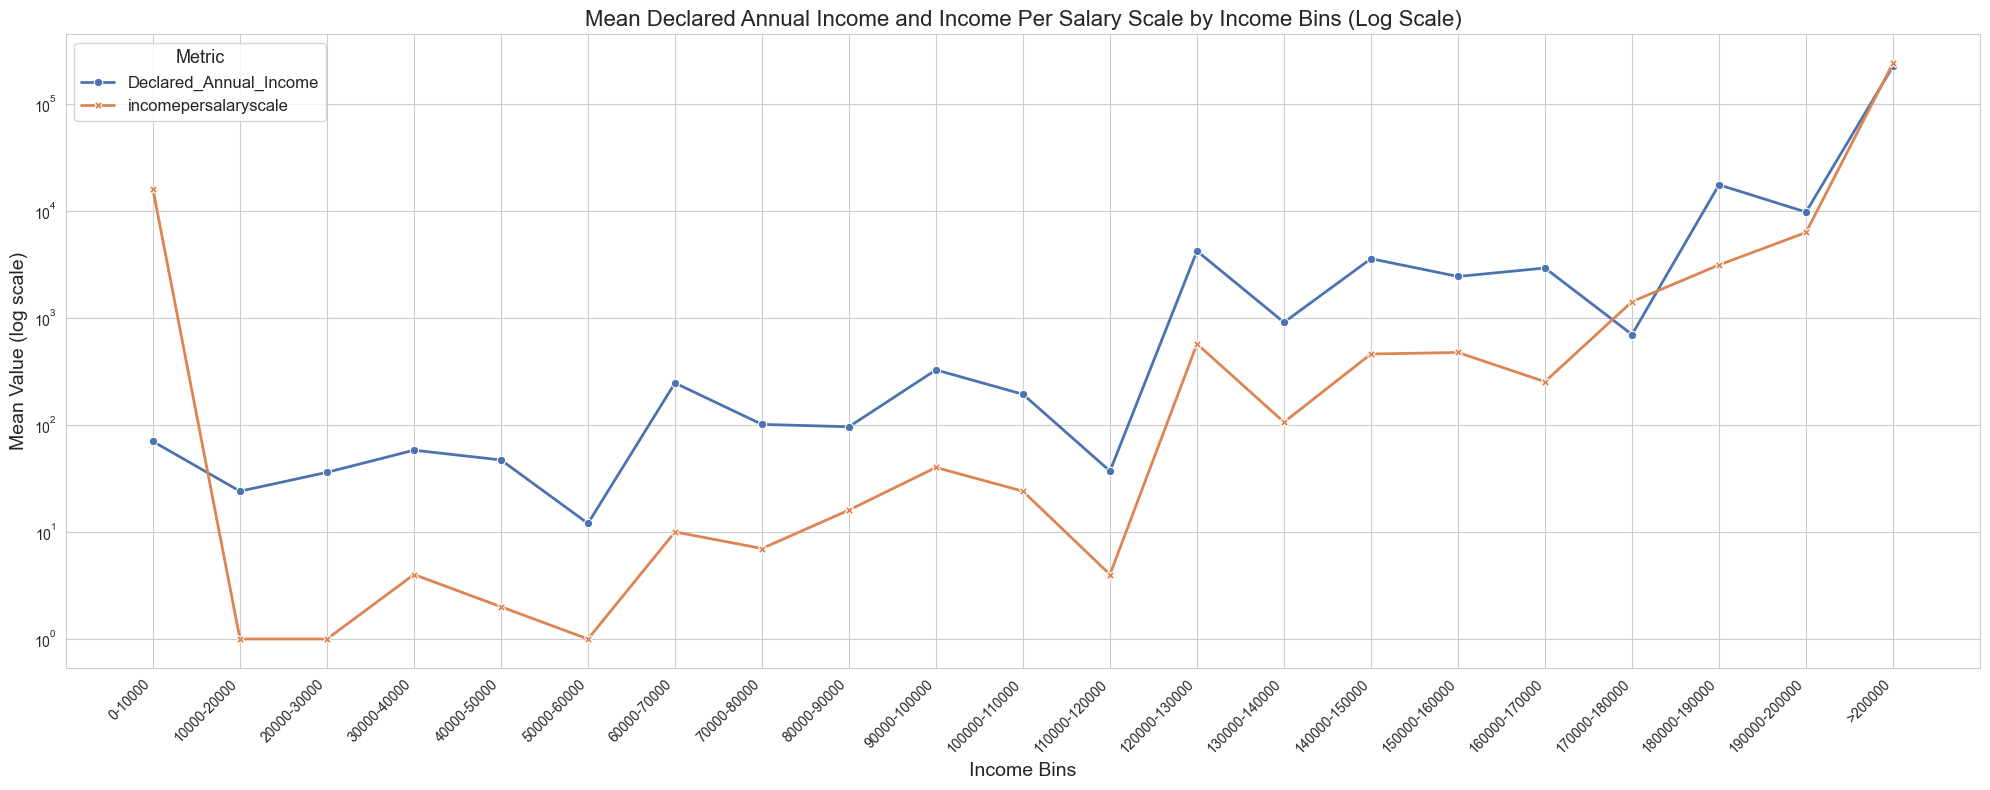

In [40]:
# Set the Seaborn style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 8))

# Create the line plot
sns.lineplot(data=df_grouped, markers=True, dashes=False, linewidth=2, ax=ax)

# Set the y-axis to logarithmic scale
ax.set_yscale('log')

# Customize the plot
ax.set_xlabel('Income Bins', fontsize=14)
ax.set_ylabel('Mean Value (log scale)', fontsize=14)
ax.set_title('Mean Declared Annual Income and Income Per Salary Scale by Income Bins (Log Scale)', fontsize=16)
ax.legend(title='Metric', title_fontsize='13', fontsize='12')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [41]:
plt.savefig("DeclaredIncomeVsIncomePerSalaryScale_withlogy.png")

<Figure size 640x480 with 0 Axes>

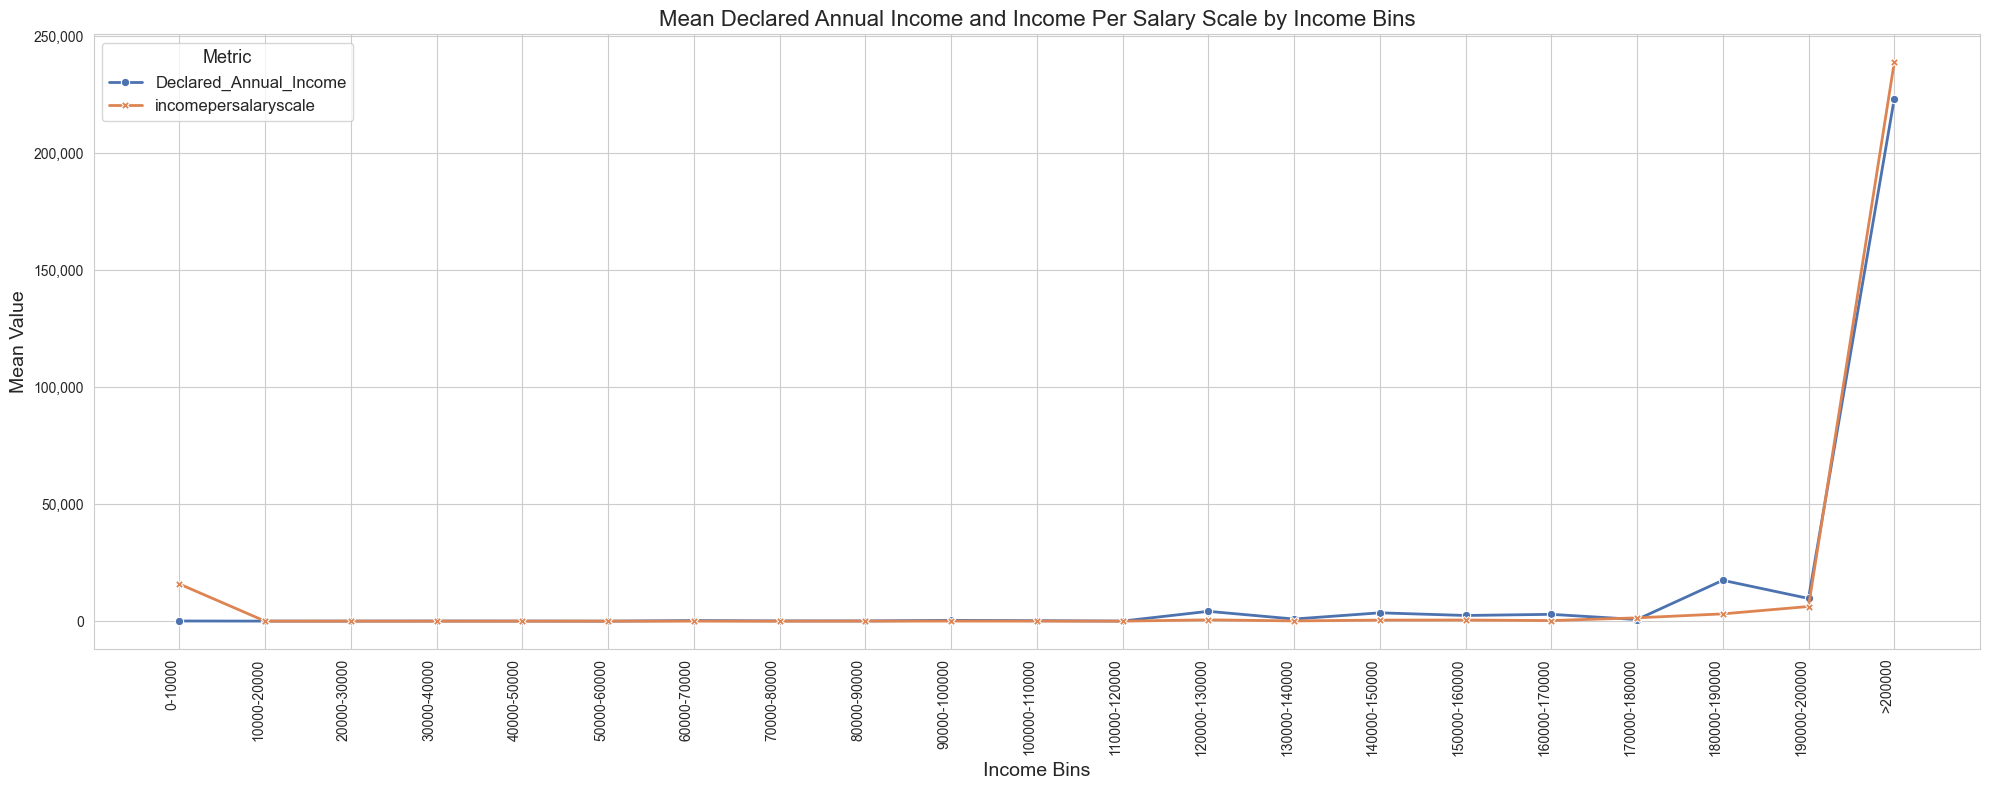

In [42]:
# Set the Seaborn style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 8))

# Create the line plot
sns.lineplot(data=df_grouped, markers=True, dashes=False, linewidth=2, ax=ax)

# Customize the plot
ax.set_xlabel('Income Bins', fontsize=14)
ax.set_ylabel('Mean Value', fontsize=14)
ax.set_title('Mean Declared Annual Income and Income Per Salary Scale by Income Bins', fontsize=16)
ax.legend(title='Metric', title_fontsize='13', fontsize='12')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Add thousand separators to y-axis labels
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [43]:
plt.savefig("DeclaredIncomeVsIncomePerSalaryScale.png")

<Figure size 640x480 with 0 Axes>

In [44]:
mdf2.columns

Index(['AnnualdeclaredIncome_bin', 'unique_customer_count_x',
       'incomeperSalaryScale_bin', 'unique_customer_count_y',
       'AnnualIncomecalculated_bin', 'unique_customer_count'],
      dtype='object')

In [45]:
mdf2.drop(columns = ['incomeperSalaryScale_bin','AnnualIncomecalculated_bin'], inplace = True)
mdf2.columns

Index(['AnnualdeclaredIncome_bin', 'unique_customer_count_x',
       'unique_customer_count_y', 'unique_customer_count'],
      dtype='object')

In [46]:
mdf2.rename(columns = {'unique_customer_count_x':'Declared_Annual_Income', 'unique_customer_count_y':'incomepersalaryscale', 'unique_customer_count':'CIC_Gross_income'}, inplace = True)
mdf2.columns

Index(['AnnualdeclaredIncome_bin', 'Declared_Annual_Income',
       'incomepersalaryscale', 'CIC_Gross_income'],
      dtype='object')

C:\Users\DwaipayanChakroborti\AppData\Local\Temp\ipykernel_17736\2226999404.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = mdf2.groupby('AnnualdeclaredIncome_bin').agg({


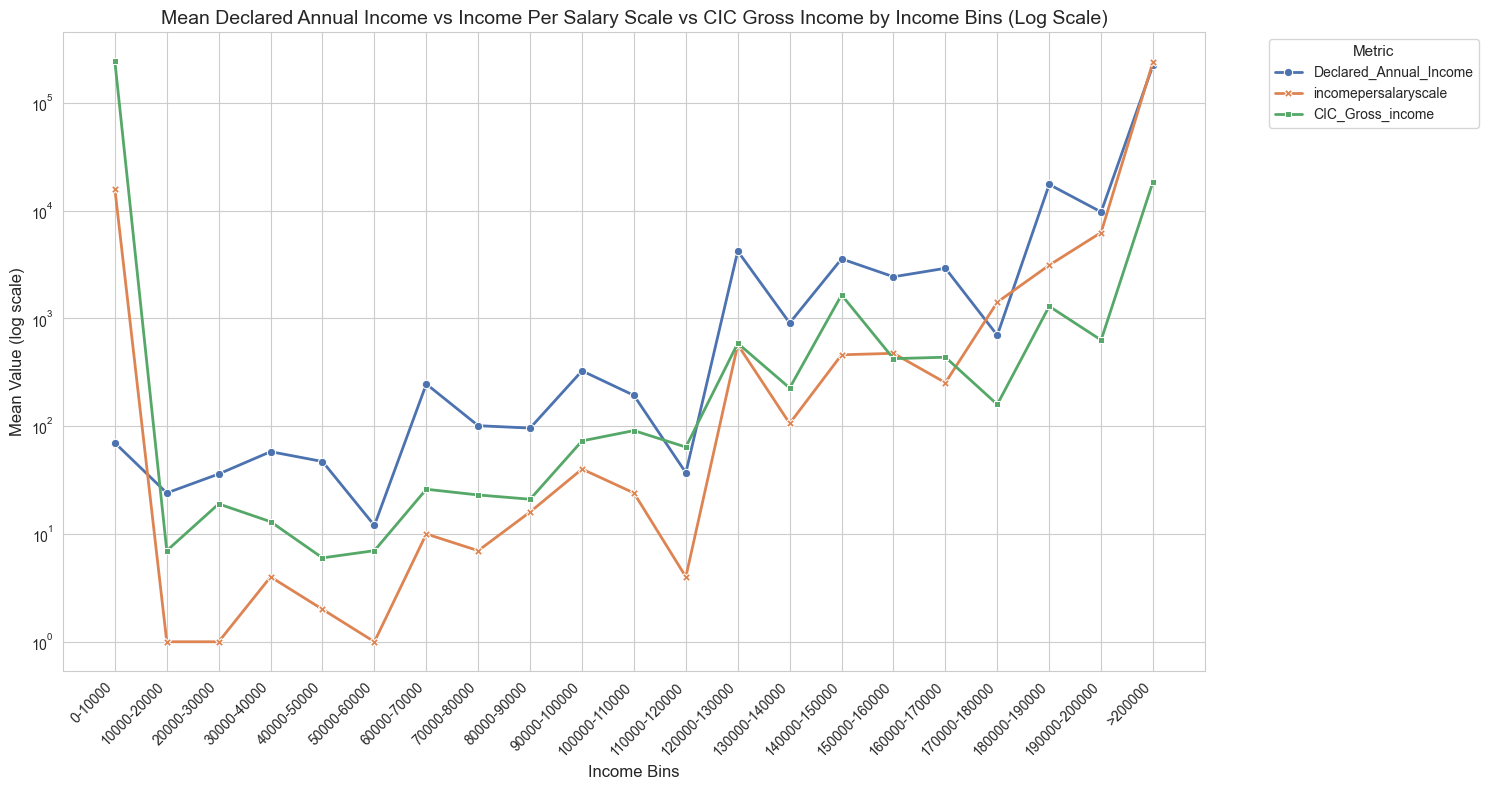

In [47]:
df_grouped = mdf2.groupby('AnnualdeclaredIncome_bin').agg({
    'Declared_Annual_Income': 'mean', 
    'incomepersalaryscale': 'mean', 
    'CIC_Gross_income': 'mean'
})

# Set the Seaborn style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Create the line plot
sns.lineplot(data=df_grouped, markers=True, dashes=False, linewidth=2, ax=ax)

# Set the y-axis to logarithmic scale
ax.set_yscale('log')

# Customize the plot
ax.set_xlabel('Income Bins', fontsize=12)
ax.set_ylabel('Mean Value (log scale)', fontsize=12)
ax.set_title('Mean Declared Annual Income vs Income Per Salary Scale vs CIC Gross Income by Income Bins (Log Scale)', fontsize=14, wrap=True)
ax.legend(title='Metric', title_fontsize='11', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()

In [48]:
plt.savefig("DeclaredIncomeVsIncomeSalaryScaleVsCICGrossIncomewithlogy.png")

<Figure size 640x480 with 0 Axes>

C:\Users\DwaipayanChakroborti\AppData\Local\Temp\ipykernel_17736\696907871.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = mdf2.groupby('AnnualdeclaredIncome_bin').agg({


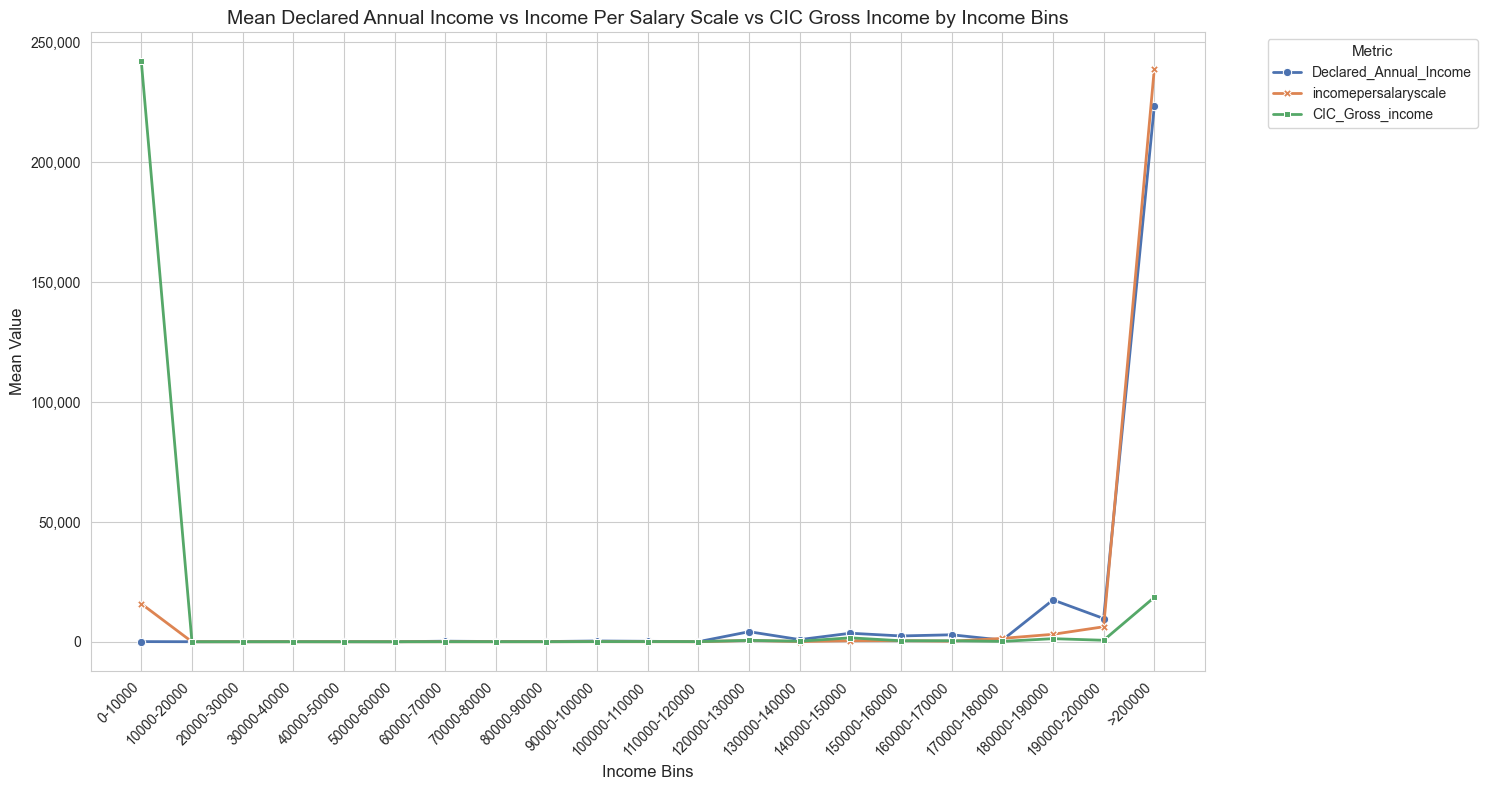

In [49]:
# Assuming mdf2 and df_grouped are already defined as in your code
df_grouped = mdf2.groupby('AnnualdeclaredIncome_bin').agg({
    'Declared_Annual_Income': 'mean', 
    'incomepersalaryscale': 'mean', 
    'CIC_Gross_income': 'mean'
})

# Set the Seaborn style
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Create the line plot
sns.lineplot(data=df_grouped, markers=True, dashes=False, linewidth=2, ax=ax)

# Customize the plot
ax.set_xlabel('Income Bins', fontsize=12)
ax.set_ylabel('Mean Value', fontsize=12)
ax.set_title('Mean Declared Annual Income vs Income Per Salary Scale vs CIC Gross Income by Income Bins', fontsize=14, wrap=True)
ax.legend(title='Metric', title_fontsize='11', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Format y-axis labels with thousand separators
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()

In [50]:
plt.savefig("DeclaredIncomeVsIncomeSalaryScaleVsCICGrossIncome.png")

<Figure size 640x480 with 0 Axes>

In [51]:
credodatapackage = pd.read_csv(r"C:\Users\DwaipayanChakroborti\OneDrive - Tonik Financial Pte Ltd\MyStuff\Biswa\IncomeEstimation\Data\PH_TonikBank_applications_20240807.csv")
credodatapackage.shape

(368903, 7)

In [52]:
credodatapackage.head()

,Package Name,# of datasets,# of datasets where app is considered as user installed,Category,Rating,Rating Description,Is Paid
0,com.tonik.mobile,685556,685553,finance,rated for 3+,undefined,free
1,android,684929,0,NaN,NaN,NaN,NaN
2,com.android.providers.settings,684922,0,NaN,NaN,NaN,NaN
3,com.android.externalstorage,684920,0,NaN,NaN,NaN,NaN
4,com.android.settings,684920,0,NaN,NaN,NaN,NaN


In [53]:
%%time

# CredoLab Data

sq = """Select  DISTINCT t1.customerId,t3.crodolabDeviceId, ca.package_name
FROM
`prj-prod-dataplatform.risk_credit_mis.loan_master_table` t1
LEFT JOIN
`prj-prod-dataplatform.dl_loans_db_raw.tdbk_digital_loan_application` t2
ON t1.digitalLoanAccountId = t2.digitalLoanAccountId
LEFT JOIN
`prj-prod-dataplatform.dl_loans_db_raw.tdbk_credolab_track` t3
ON t2.credolabRefNumber = t3.refno
LEFT JOIN
`prj-prod-dataplatform.credolab_raw.android_credolab_datasets_struct_columns` t4
ON t3.refno = t4.deviceId
inner join
`prj-prod-dataplatform.core_raw.loan_accounts` loan
on loan.CUSTOMERID = t1.customerId
 INNER JOIN
(select deviceId, af.package_name as package_name, af.first_install_time as first_install_time from `prj-prod-dataplatform.credolab_raw.android_credolab_Application`  ,
unnest(Application) as af) ca
ON ca.deviceId = t3.refno
where date_trunc(t1.startApplyDateTime, day) >'2024-04-30'
;"""

df_risk_table_2  = client.query(sq).to_dataframe(progress_bar_type = 'tqdm')
print(f"The rows and columns in the credolab dataframe are:\t {df_risk_table_2.shape}")

Job ID 819da304-88bb-4233-b6d2-6232e5489ed3 successfully executed: 100%|██████████|
Downloading: 100%|██████████|
The rows and columns in the credolab dataframe are:	 (12953212, 3)
CPU times: total: 2min 16s
Wall time: 25min 12s


In [ ]:
duplicate_rows = df_risk_table_2[df_risk_table_2.duplicated()]

# To see all duplicate rows, including the first occurrence:
all_duplicates = df_risk_table_2[df_risk_table_2.duplicated(keep=False)]

all_duplicates.head()